In [ ]:

pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [ ]:
import pandas as pd
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df=df.drop('id',axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.fillna(method="bfill",inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,32.5,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,40.0,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,10].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
x[:,0]=labelencoder_x.fit_transform(x[:,0])
x[:,4]=labelencoder_x.fit_transform(x[:,4])
x[:,5]=labelencoder_x.fit_transform(x[:,5])
x[:,6]=labelencoder_x.fit_transform(x[:,6])
x[:,9]=labelencoder_x.fit_transform(x[:,9])
x

array([[1, 67.0, 0, ..., 228.69, 36.6, 1],
       [0, 61.0, 0, ..., 202.21, 32.5, 2],
       [1, 80.0, 0, ..., 105.92, 32.5, 2],
       ...,
       [0, 35.0, 0, ..., 82.99, 30.6, 2],
       [1, 51.0, 0, ..., 166.29, 25.6, 1],
       [0, 44.0, 0, ..., 85.28, 26.2, 0]], dtype=object)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Decision tree
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9501285347043702

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[923,  50],
       [ 47, 925]])

In [ ]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       973
           1       0.95      0.95      0.95       972

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



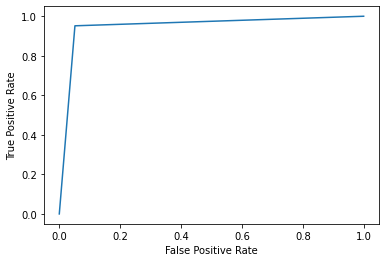

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

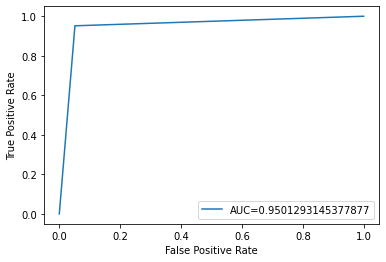

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

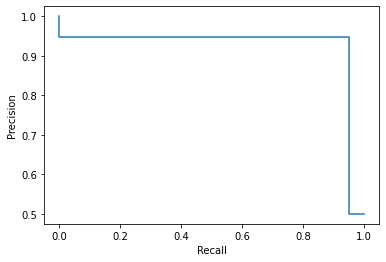

In [ ]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8997429305912596

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       973
           1       0.84      0.98      0.91       972

    accuracy                           0.90      1945
   macro avg       0.91      0.90      0.90      1945
weighted avg       0.91      0.90      0.90      1945



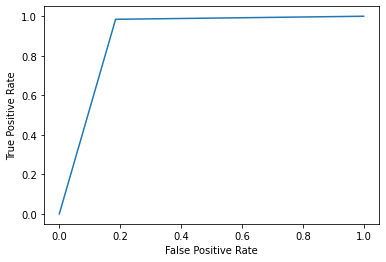

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

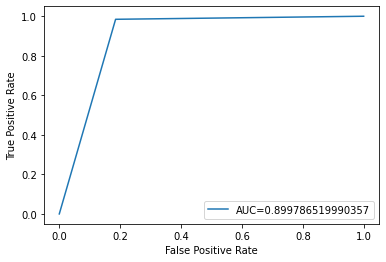

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

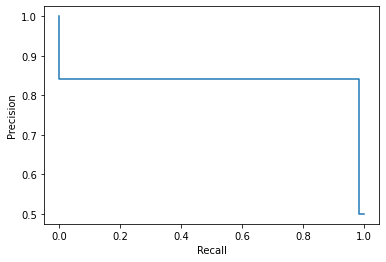

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
#svm
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7758354755784062

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[711, 262],
       [174, 798]])

In [ ]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       973
           1       0.75      0.82      0.79       972

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



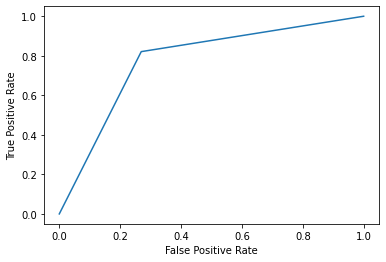

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

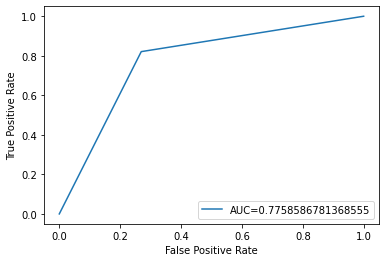

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

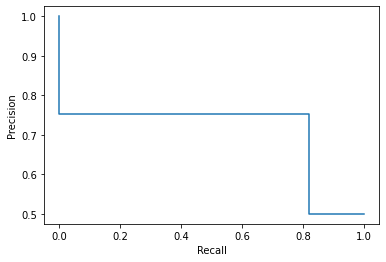

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9665809768637532

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[956,  17],
       [ 48, 924]])

In [ ]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       973
           1       0.98      0.95      0.97       972

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



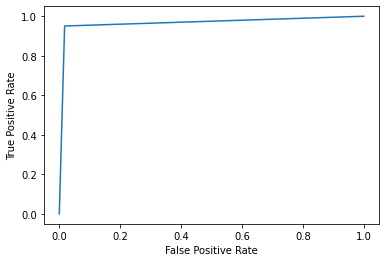

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

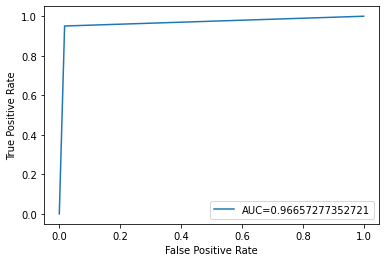

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

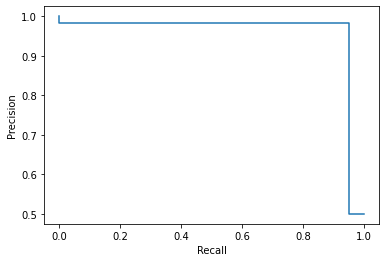

In [ ]:

precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7881748071979434

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[724, 249],
       [163, 809]])

In [ ]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       973
           1       0.76      0.83      0.80       972

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.79      0.79      0.79      1945



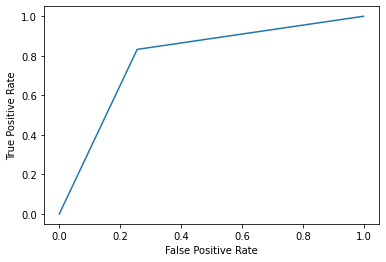

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

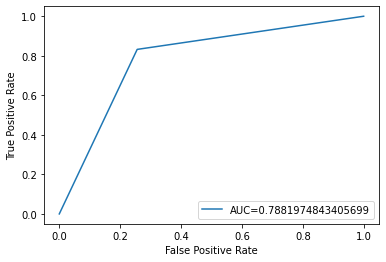

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

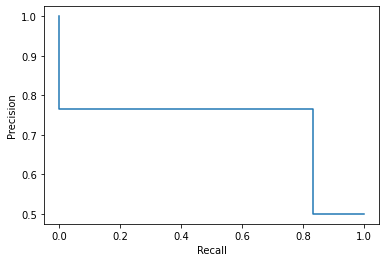

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7773778920308483

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[708, 265],
       [168, 804]])

In [ ]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       973
           1       0.75      0.83      0.79       972

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



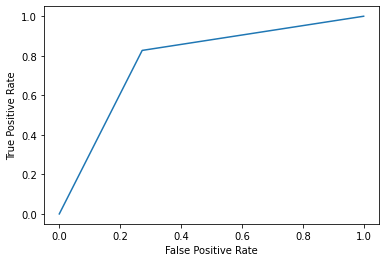

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

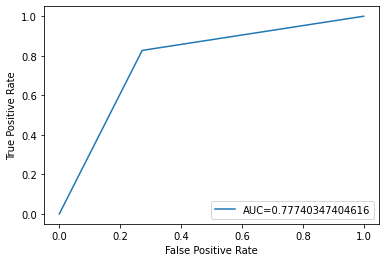

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

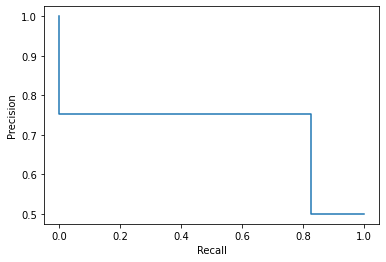

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [ ]:
#fuzzy
from fcmeans import FCM
classifier = FCM(n_clusters=2)
classifier.fit(x)

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.37994858611825194

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[114, 859],
       [347, 625]])

In [ ]:
from sklearn.metrics import classification_report
targets=['0','1']
print(classification_report(y_test,pred,target_names=targets))

              precision    recall  f1-score   support

           0       0.25      0.12      0.16       973
           1       0.42      0.64      0.51       972

    accuracy                           0.38      1945
   macro avg       0.33      0.38      0.33      1945
weighted avg       0.33      0.38      0.33      1945



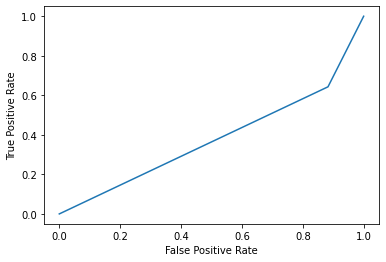

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

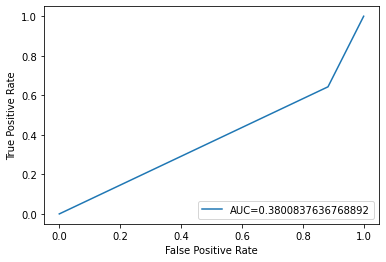

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

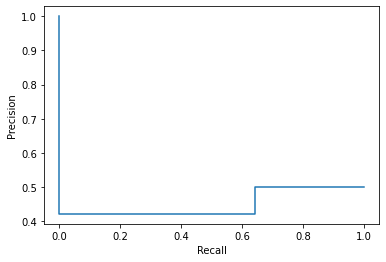

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [ ]:
from sklearn.datasets import make_classification
def new_dataset():
  X, Y = make_classification(n_samples=5110, n_features=11, n_informative=11,n_redundant=0,random_state=1)
  return X,Y

In [ ]:
def new_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['dt'] = tree.DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['rf']=RandomForestClassifier()
  models['stacking'] = new_stacking()
  return models

In [ ]:
from sklearn.ensemble import StackingClassifier
def new_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('dt', tree.DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))
  level0.append(('rf',RandomForestClassifier() ))
  level1 = LogisticRegression()
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=6)
  return model

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
def eval_model(model):
  cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=2)
  scr = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-2, error_score='raise')
  return scr

>lr 0.8519 (0.0223)
>knn 0.9701 (0.0090)
>dt 0.8581 (0.0179)
>svm 0.9693 (0.0094)
>bayes 0.8405 (0.0210)
>rf 0.9402 (0.0148)
>stacking 0.9749 (0.0080)


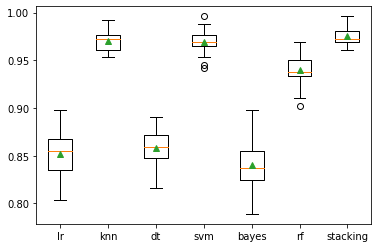

In [ ]:
from numpy import mean
from numpy import std
X,Y = new_dataset()
models = new_models()
results, names = list(), list()
for name, model in models.items():
  scr = eval_model(model)
  results.append(scr)
  names.append(name)
  print('>%s %.4f (%.4f)' % (name, mean(scr), std(scr)))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
244/244 [==============================] - 3s 2ms/step - loss: 1.0778 - accuracy: 0.6869
Epoch 2/50
244/244 [==============================] - 1s 3ms/step - loss: 0.6692 - accuracy: 0.7072
Epoch 3/50
244/244 [==============================] - 1s 3ms/step - loss: 0.5892 - accuracy: 0.7163
Epoch 4/50
244/244 [==============================] - 1s 3ms/step - loss: 0.5574 - accuracy: 0.7223
Epoch 5/50
244/244 [==============================] - 1s 3ms/step - loss: 0.5413 - accuracy: 0.7278
Epoch 6/50
244/244 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.7329
Epoch 7/50
244/244 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7373
Epoch 8/50
244/244 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.7394
Epoch 9/50
244/244 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7433
Epoch 10/50
244/244 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.7495

In [ ]:
y_pred = ann.predict(x_test)

61/61 [==============================] - 0s 3ms/step


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
import numpy as np
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [1 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[757, 216],
       [215, 757]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7784061696658098

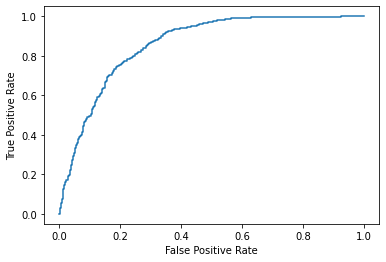

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

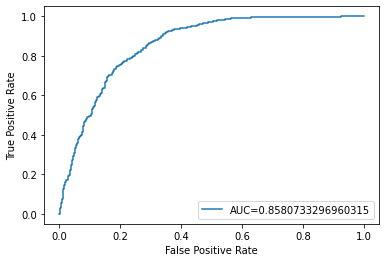

In [ ]:
auc = metrics.roc_auc_score(y_test,pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

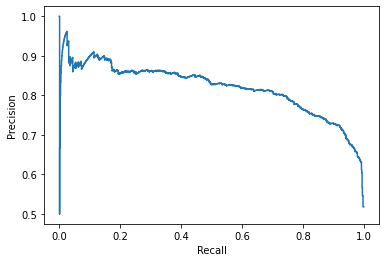

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()